In [220]:
import os

import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import datetime
import numpy as np
import yfinance as yf
from scipy.stats import norm
import matplotlib.pyplot as plt

%matplotlib inline

In [221]:
load_dotenv(".env")

True

In [222]:
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
alpaca_endpoint = os.getenv("alpaca_endpoint")

alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2",
    base_url = alpaca_endpoint)

In [223]:
api = tradeapi.REST(alpaca_api_key, alpaca_secret_key, alpaca_endpoint)

In [224]:
today = pd.Timestamp("2023-05-02", tz="America/New_York").isoformat()

In [225]:
start = pd.Timestamp("2008-05-02", tz="America/New_York").isoformat()
end = pd.Timestamp("2023-05-02", tz="America/New_York").isoformat()

In [226]:
tickers = ["XLK","XLV","XLI","XLC","XLY","XLP","XLE","XLF","XLB","XLRE","XLU"]

In [227]:
timeframe = "1day"

In [228]:
df_portfolio_8_year = alpaca.get_bars(
    tickers,
    timeframe,
    start = start,
    end = end 
).df

df_portfolio_8_year

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2015-12-01 05:00:00+00:00,45.76,46.0600,45.600,46.05,7717036,27667,45.921989,XLB
2015-12-02 05:00:00+00:00,45.91,46.0200,45.280,45.43,8005887,24522,45.556902,XLB
2015-12-03 05:00:00+00:00,45.65,45.7300,44.795,45.03,5828780,28059,45.184572,XLB
2015-12-04 05:00:00+00:00,45.13,45.9400,44.990,45.82,5607746,27545,45.606292,XLB
2015-12-07 05:00:00+00:00,45.57,45.7900,44.710,45.00,6163064,23783,44.993662,XLB
...,...,...,...,...,...,...,...,...
2023-04-26 04:00:00+00:00,145.16,145.6300,143.400,143.69,3853004,49809,144.516404,XLY
2023-04-27 04:00:00+00:00,144.70,147.6500,144.600,147.48,4815387,68454,146.631320,XLY
2023-04-28 04:00:00+00:00,146.79,148.0609,145.415,147.86,3691034,57745,147.097681,XLY


In [229]:
symbol = "tickers"

In [230]:
XLK = df_portfolio_8_year[df_portfolio_8_year['symbol']=='XLK'].drop('symbol', axis=1)
XLV = df_portfolio_8_year[df_portfolio_8_year['symbol']=='XLV'].drop('symbol', axis=1)
XLI = df_portfolio_8_year[df_portfolio_8_year['symbol']=='XLI'].drop('symbol', axis=1)
XLC = df_portfolio_8_year[df_portfolio_8_year['symbol']=='XLC'].drop('symbol', axis=1)
XLY = df_portfolio_8_year[df_portfolio_8_year['symbol']=='XLY'].drop('symbol', axis=1)
XLP = df_portfolio_8_year[df_portfolio_8_year['symbol']=='XLP'].drop('symbol', axis=1)
XLE = df_portfolio_8_year[df_portfolio_8_year['symbol']=='XLE'].drop('symbol', axis=1)
XLF = df_portfolio_8_year[df_portfolio_8_year['symbol']=='XLF'].drop('symbol', axis=1)
XLB = df_portfolio_8_year[df_portfolio_8_year['symbol']=='XLB'].drop('symbol', axis=1)
XLRE = df_portfolio_8_year[df_portfolio_8_year['symbol']=='XLRE'].drop('symbol', axis=1)
XLU = df_portfolio_8_year[df_portfolio_8_year['symbol']=='XLU'].drop('symbol', axis=1)

df_portfolio_8_year = pd.concat([XLK,XLV,XLI,XLC,XLY,XLP,XLE,XLF,XLB,XLRE,XLU],axis=1, keys=["XLK","XLV","XLI","XLC","XLY","XLP","XLE","XLF","XLB","XLRE","XLU"])

df_portfolio_8_year

XLK                                       \
                             open      high      low   close    volume   
timestamp                                                                
2015-12-01 05:00:00+00:00   44.14   44.3600   44.045   44.35   7779488   
2015-12-02 05:00:00+00:00   44.40   44.5650   44.020   44.08   9697088   
2015-12-03 05:00:00+00:00   44.19   44.3200   43.290   43.50  11854265   
2015-12-04 05:00:00+00:00   43.63   44.6450   43.540   44.57  12840171   
2015-12-07 05:00:00+00:00   44.52   44.5577   44.140   44.35  12814944   
...                           ...       ...      ...     ...       ...   
2023-04-26 04:00:00+00:00  146.50  147.6200  145.760  146.11   6801804   
2023-04-27 04:00:00+00:00  146.80  149.3150  146.440  149.21   6042384   
2023-04-28 04:00:00+00:00  149.21  150.8600  149.050  150.83   5123786   
2023-05-01 04:00:00+00:00  150.71  151.6475  150.470  150.92   4097311   
2023-05-02 04:00:00+00:00  151.10  151.2700  148.730  149.51   6029557   

                                                      XLV                      \
                          trade_count        vwap    open      high       low   
timestamp                                                                       
2015-12-01 05:00:00+00:00       25116   44.230051   71.48   72.3700   71.3171   
2015-12-02 05:00:00+00:00       28153   44.323713   72.39   72.6085   71.5900   
2015-12-03 05:00:00+00:00       33797   43.723955   71.76   71.8500   69.8200   
2015-12-04 05:00:00+00:00       35916   44.328743   70.44   71.8900   70.2720   
2015-12-07 05:00:00+00:00       25604   44.332508   71.63   72.0000   71.0100   
...                               ...         ...     ...       ...       ...   
2023-04-26 04:00:00+00:00       79730  146.450357  132.43  132.5200  130.9200   
2023-04-27 04:00:00+00:00       68503  148.193463  131.77  132.5850  130.6200   
2023-04-28 04:00:00+00:00       71072  150.044518  132.24  133.9050  132.0300   
2023-05-01 04:00:00+00:00       52256  151.053095  133.72  134.7550  133.4600   
2023-05-02 04:00:00+00:00       76073  149.543893  134.00  134.8500  132.6800   

                           ...     XLRE                           XLU          \
                           ...   volume trade_count       vwap   open    high   
timestamp                  ...                                                  
2015-12-01 05:00:00+00:00  ...     5557          35  31.085091  42.92  43.250   
2015-12-02 05:00:00+00:00  ...     4397          27  30.948158  42.99  43.100   
2015-12-03 05:00:00+00:00  ...      776           7  30.155751  42.13  42.140   
2015-12-04 05:00:00+00:00  ...     4378          22  30.703560  42.03  42.530   
2015-12-07 05:00:00+00:00  ...        0           0   0.000000  42.37  42.680   
...                        ...      ...         ...        ...    ...     ...   
2023-04-26 04:00:00+00:00  ...  4446325       26622  36.651611  69.36  69.575   
2023-04-27 04:00:00+00:00  ...  4278753       26225  37.085132  68.46  69.140   
2023-04-28 04:00:00+00:00  ...  4615210       24851  37.641116  68.88  69.390   
2023-05-01 04:00:00+00:00  ...  4381930       27680  37.557084  68.82  69.770   
2023-05-02 04:00:00+00:00  ...  6376387       30990  36.798997  69.04  69.220   

                                                                            
                               low  close    volume trade_count       vwap  
timestamp                                                                   
2015-12-01 05:00:00+00:00  42.7500  43.16  12551543       44273  43.040413  
2015-12-02 05:00:00+00:00  42.1900  42.20  12566056       43285  42.440103  
2015-12-03 05:00:00+00:00  41.7400  41.88  14879220       60857  41.935748  
2015-12-04 05:00:00+00:00  41.9000  42.47  10961473       43227  42.383786  
2015-12-07 05:00:00+00:00  42.1701  42.66  13515101       39592  42.524453  
...                            ...    ...       ...         ...        ...  
2023-04-26 04:00:00+00:00  68.

<Axes: title={'center': 'Sector Data'}, xlabel='timestamp'>

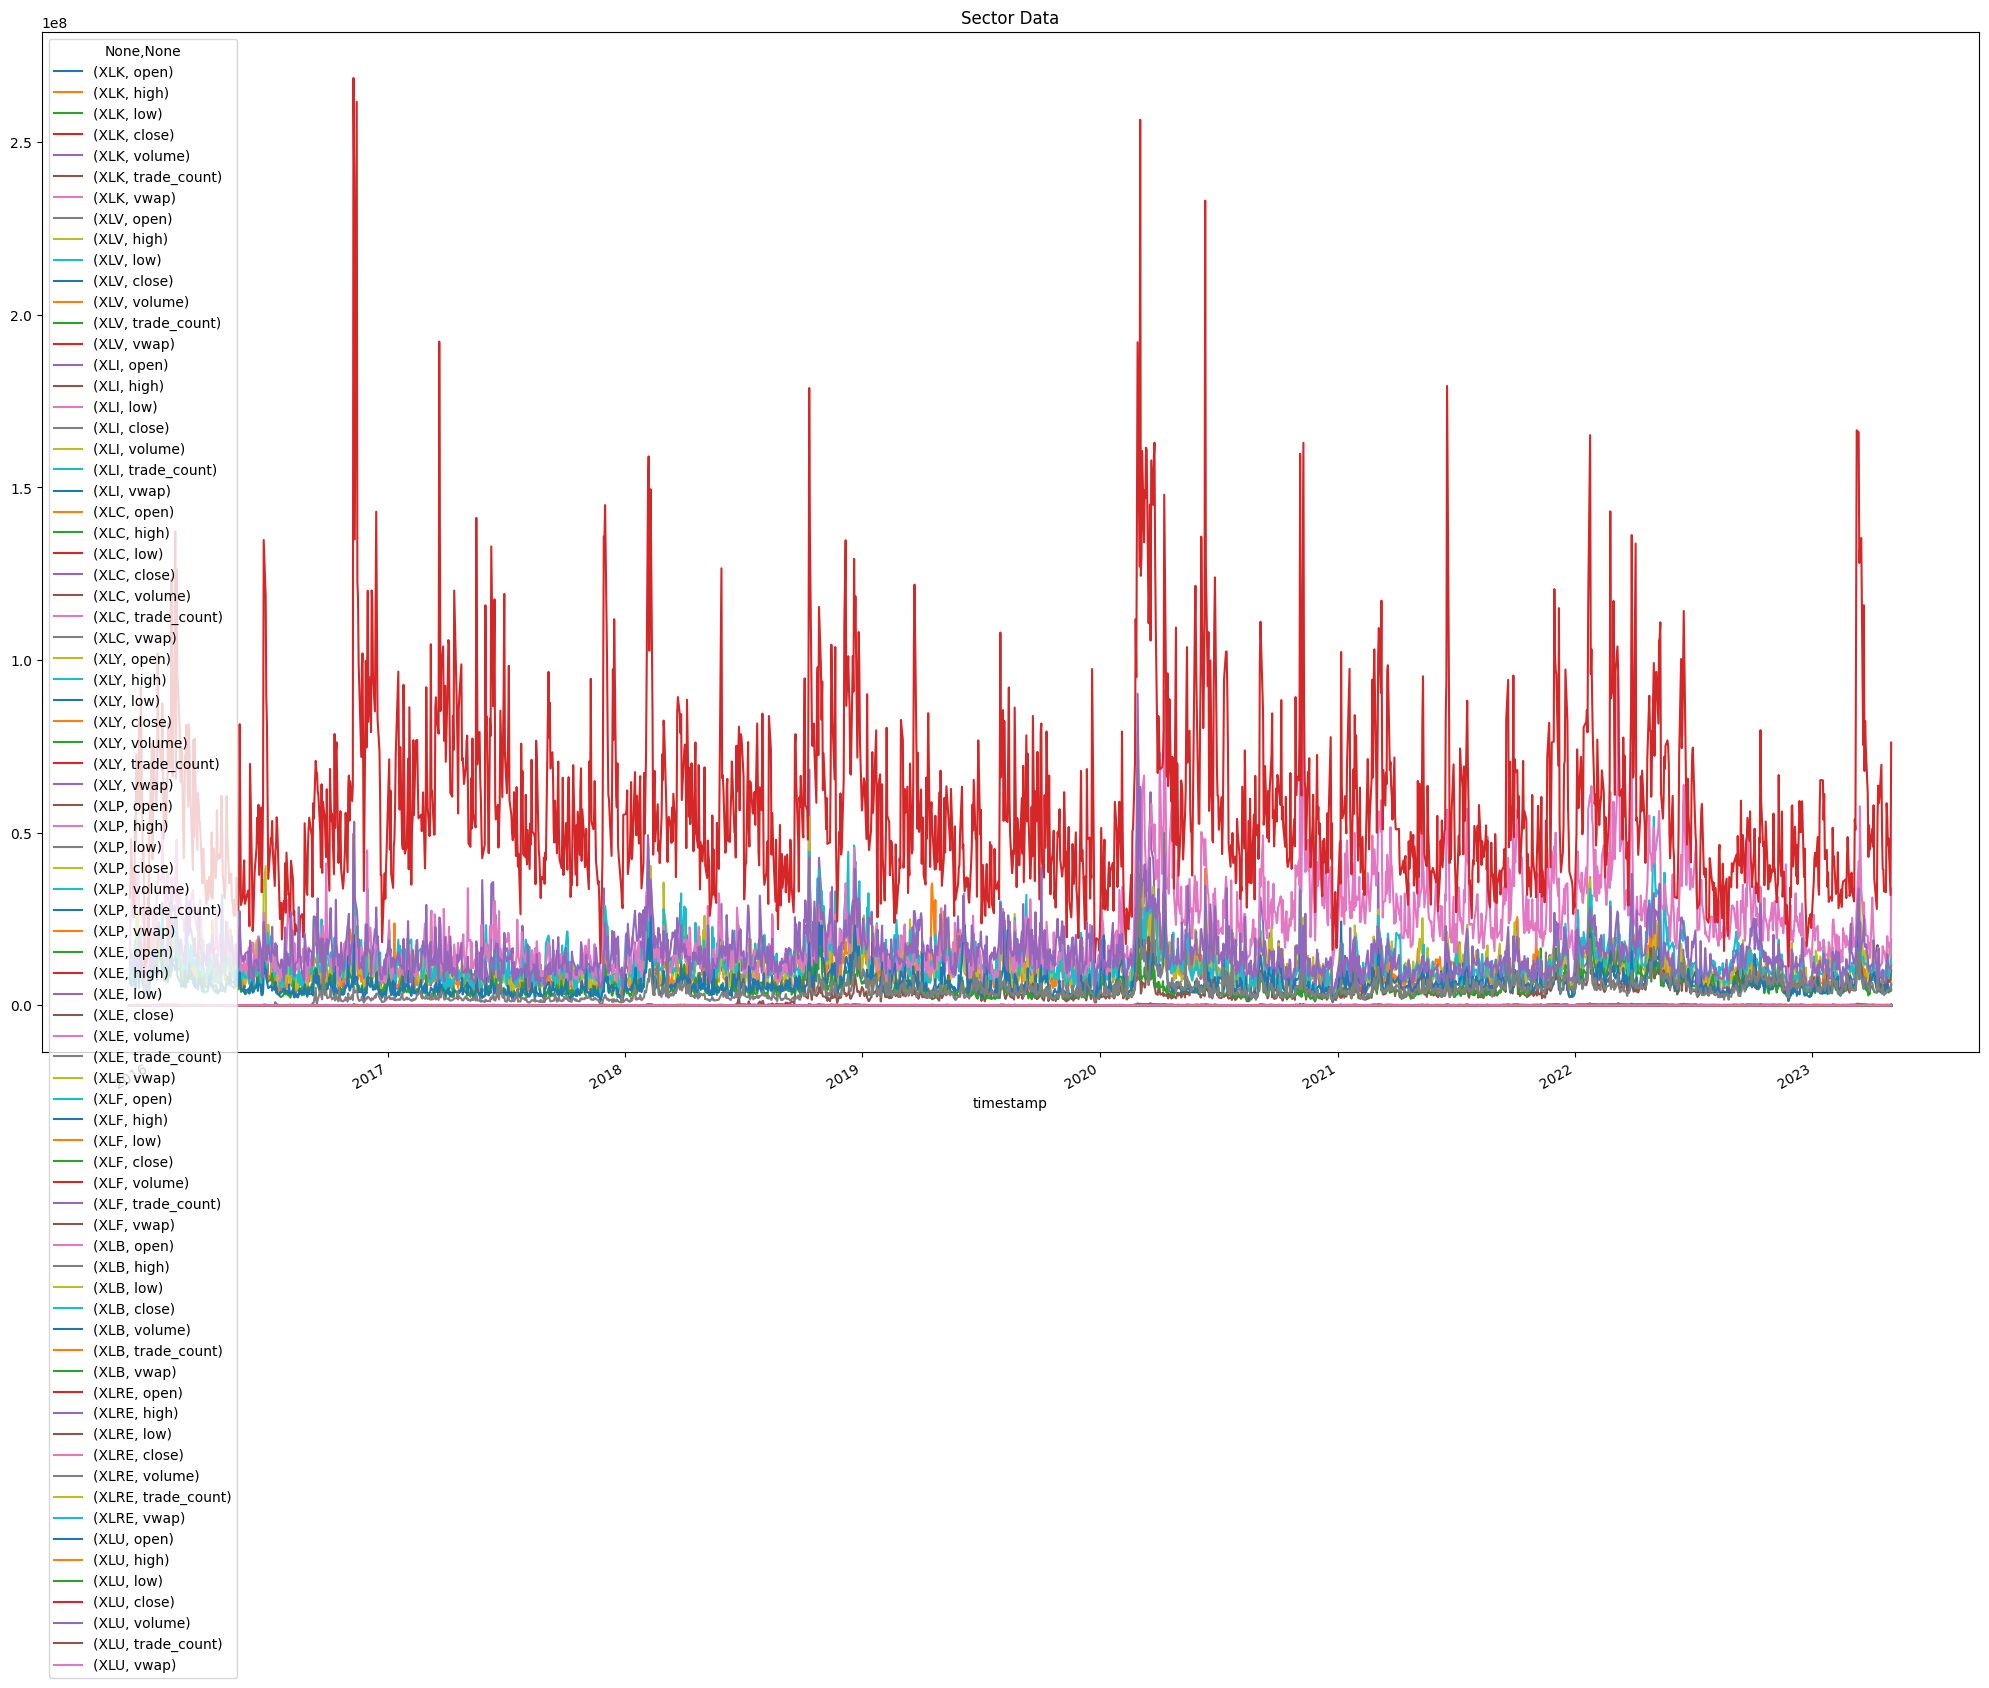

In [231]:
df_portfolio_8_year.plot( title="Sector Data" , figsize=(25, 15))

In [232]:
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = start,
    end = end
).df

df_portfolio.head(10)

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2015-12-01 05:00:00+00:00,45.76,46.06,45.600,46.05,7717036,27667,45.921989,XLB
2015-12-02 05:00:00+00:00,45.91,46.02,45.280,45.43,8005887,24522,45.556902,XLB
2015-12-03 05:00:00+00:00,45.65,45.73,44.795,45.03,5828780,28059,45.184572,XLB
2015-12-04 05:00:00+00:00,45.13,45.94,44.990,45.82,5607746,27545,45.606292,XLB
2015-12-07 05:00:00+00:00,45.57,45.79,44.710,45.00,6163064,23783,44.993662,XLB
2015-12-08 05:00:00+00:00,44.53,44.91,44.090,44.15,7426193,32371,44.389901,XLB
2015-12-09 05:00:00+00:00,45.29,46.06,45.010,45.48,12961441,58009,45.600844,XLB
2015-12-10 05:00:00+00:00,45.20,45.57,44.840,45.14,5285799,26249,45.237044,XLB
2015-12-11 05:00:00+00:00,43.97,44.47,43.880,43.94,9544225,47631,44.103711,XLB


In [233]:
daily_std = df_portfolio_8_year.std().sort_values(ascending=False)
daily_std

XLF   volume    2.769865e+07
XLE   volume    1.201102e+07
XLK   volume    6.612469e+06
XLU   volume    6.532708e+06
XLP   volume    6.358632e+06
                    ...     
XLRE  high      5.405290e+00
XLF   low       5.381299e+00
XLRE  open      5.363852e+00
      close     5.359282e+00
      low       5.306566e+00
Length: 77, dtype: float64

In [234]:
annualized_std = daily_std *np.sqrt(252)
annualized_std.sort_values(ascending=False)

XLF   volume    4.397024e+08
XLE   volume    1.906690e+08
XLK   volume    1.049697e+08
XLU   volume    1.037035e+08
XLP   volume    1.009402e+08
                    ...     
XLRE  high      8.580632e+01
XLF   low       8.542547e+01
XLRE  open      8.514851e+01
      close     8.507596e+01
      low       8.423912e+01
Length: 77, dtype: float64

<Axes: title={'center': '21 Day Rolling Standard Deviation'}, xlabel='timestamp'>

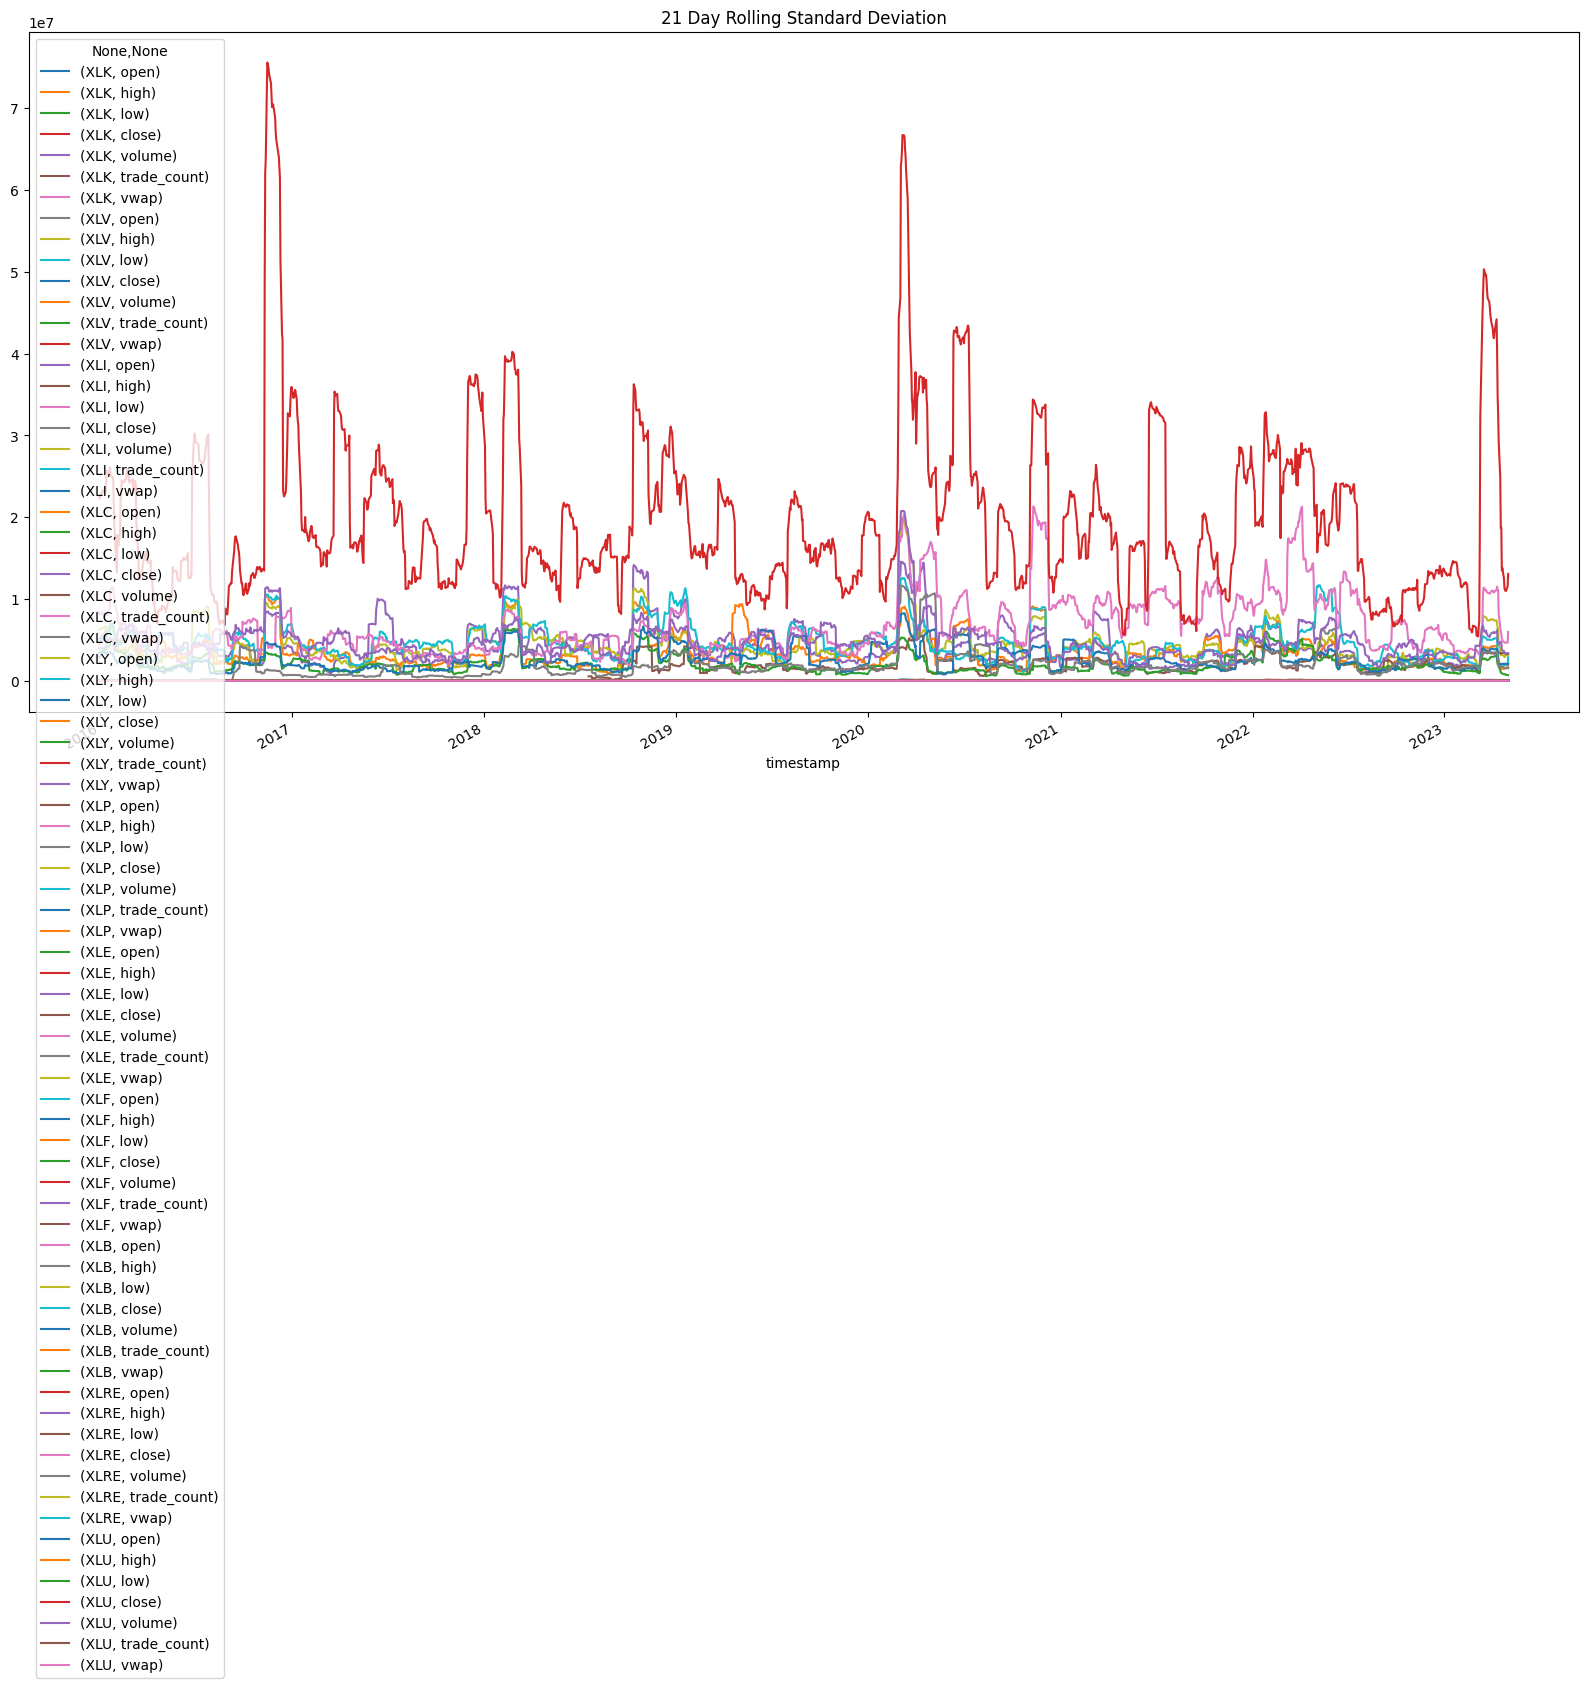

In [235]:
df_portfolio_8_year.rolling(window=21).std().plot(title="21 Day Rolling Standard Deviation", figsize=(20,10))

In [236]:
XLK_beta = df_portfolio_8_year['XLK'].rolling(window=60).cov(df_portfolio_8_year['XLK']) / df_portfolio_8_year['XLK'].rolling(window=60).var()
XLV_beta = df_portfolio_8_year['XLV'].rolling(window=60).cov(df_portfolio_8_year['XLV']) / df_portfolio_8_year['XLV'].rolling(window=60).var()
XLI_beta = df_portfolio_8_year['XLI'].rolling(window=60).cov(df_portfolio_8_year['XLI']) / df_portfolio_8_year['XLI'].rolling(window=60).var()
XLC_beta = df_portfolio_8_year['XLC'].rolling(window=60).cov(df_portfolio_8_year['XLC']) / df_portfolio_8_year['XLC'].rolling(window=60).var()
XLY_beta = df_portfolio_8_year['XLY'].rolling(window=60).cov(df_portfolio_8_year['XLY']) / df_portfolio_8_year['XLY'].rolling(window=60).var()
XLP_beta = df_portfolio_8_year['XLP'].rolling(window=60).cov(df_portfolio_8_year['XLP']) / df_portfolio_8_year['XLP'].rolling(window=60).var()
XLE_beta = df_portfolio_8_year['XLE'].rolling(window=60).cov(df_portfolio_8_year['XLE']) / df_portfolio_8_year['XLE'].rolling(window=60).var()
XLF_beta = df_portfolio_8_year['XLF'].rolling(window=60).cov(df_portfolio_8_year['XLF']) / df_portfolio_8_year['XLF'].rolling(window=60).var()
XLB_beta = df_portfolio_8_year['XLB'].rolling(window=60).cov(df_portfolio_8_year['XLB']) / df_portfolio_8_year['XLB'].rolling(window=60).var()
XLRE_beta = df_portfolio_8_year['XLRE'].rolling(window=60).cov(df_portfolio_8_year['XLRE']) / df_portfolio_8_year['XLRE'].rolling(window=60).var()
XLU_beta = df_portfolio_8_year['XLU'].rolling(window=60).cov(df_portfolio_8_year['XLU']) / df_portfolio_8_year['XLU'].rolling(window=60).var()

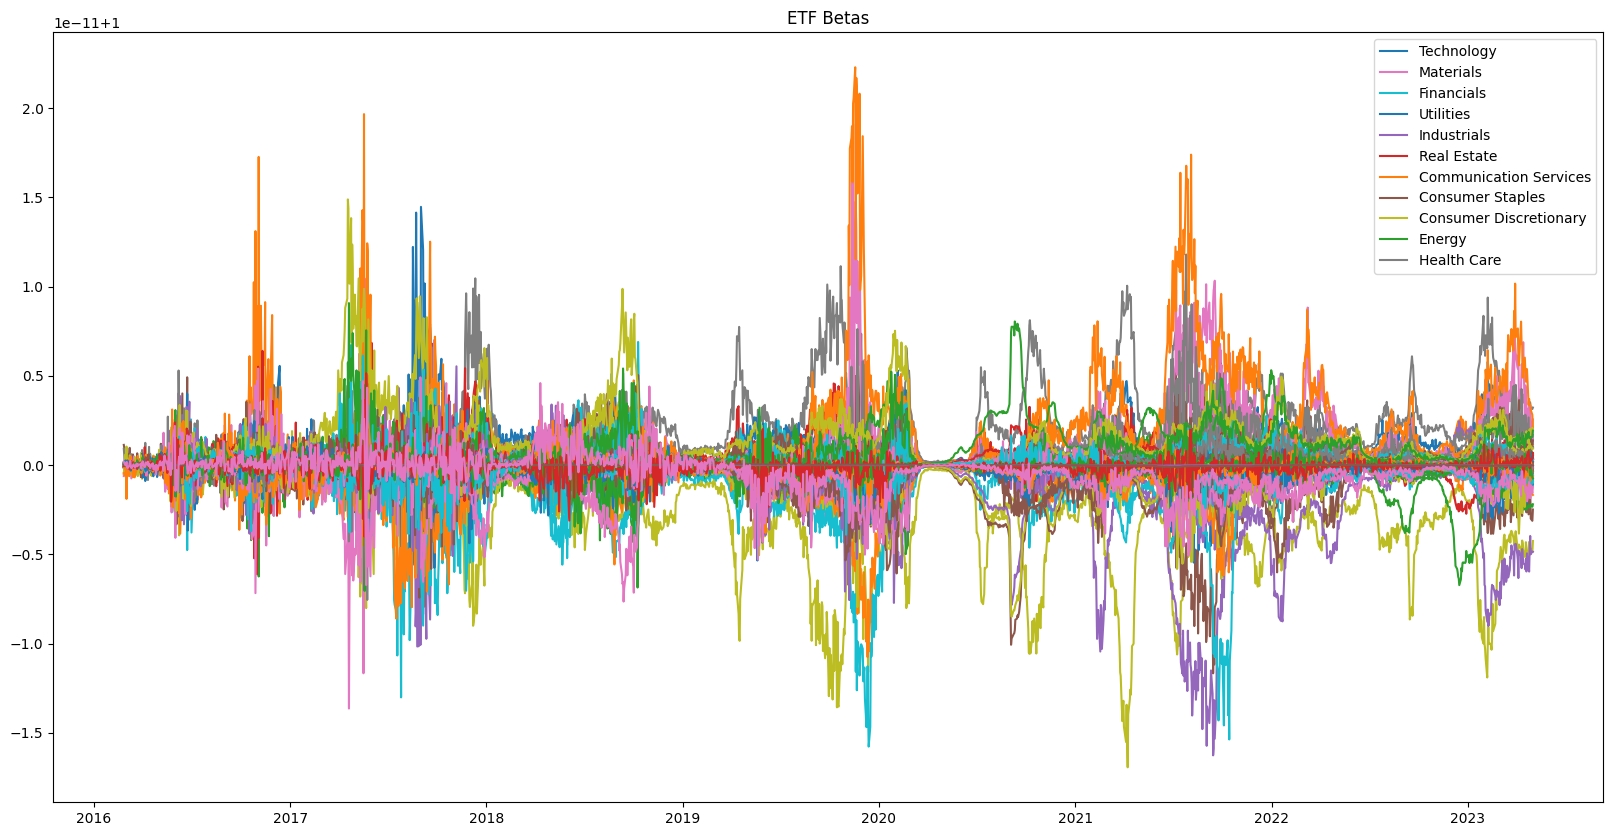

In [237]:
etfs = {
    'XLK': 'Technology',
    'XLV': 'Health Care',
    'XLI': 'Industrials',
    'XLC': 'Communication Services',
    'XLY': 'Consumer Discretionary',
    'XLP': 'Consumer Staples',
    'XLE': 'Energy',
    'XLF': 'Financials',
    'XLB': 'Materials',
    'XLRE': 'Real Estate',
    'XLU': 'Utilities'
}

fig, ax = plt.subplots(figsize=(20, 10))

for etf in etfs:
    beta = df_portfolio_8_year[etf].rolling(window=60).cov(df_portfolio_8_year[etf]) / df_portfolio_8_year[etf].rolling(window=60).var()
    ax.plot(beta.index, beta, label=etfs[etf])

handles, labels = ax.get_legend_handles_labels()
unique_labels = list(set(labels))
custom_handles = [handles[labels.index(l)] for l in unique_labels]
ax.legend(custom_handles, unique_labels)

ax.set_title('ETF Betas')

plt.show()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Year-over-Year Gain/Loss for XLK: 13.06%
Year-over-Year Gain/Loss for XLV: 7.40%
Year-over-Year Gain/Loss for XLI: 8.70%
Year-over-Year Gain/Loss for XLC: 1.85%
Year-over-Year Gain/Loss for XLY: -1.79%
Year-over-Year Gain/Loss for XLP: 3.28%

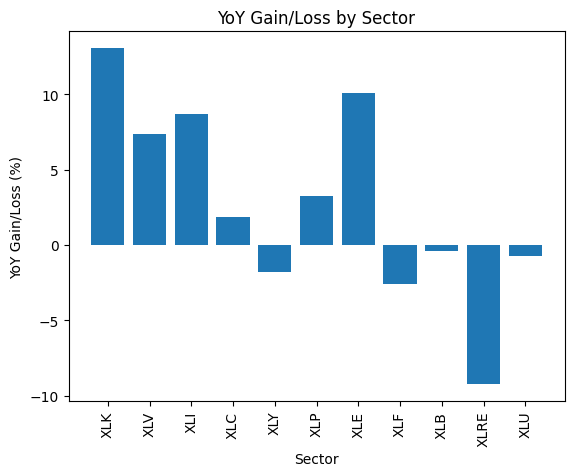

In [238]:
sectors = ['XLK', 'XLV', 'XLI', 'XLC', 'XLY', 'XLP', 'XLE', 'XLF', 'XLB', 'XLRE', 'XLU']


sector_gains_losses = {}


for sector in sectors:

    df = yf.download(sector, start="2022-05-07", end="2023-05-06")

    yoy_return = ((df['Adj Close'][-1] - df['Adj Close'][0]) / df['Adj Close'][0]) * 100

    sector_gains_losses[sector] = round(yoy_return, 2)

for sector, yoy in sector_gains_losses.items():
    print("Year-over-Year Gain/Loss for {}: {:.2f}%".format(sector, yoy))
    
plt.bar(sector_gains_losses.keys(), sector_gains_losses.values())
plt.title('YoY Gain/Loss by Sector')
plt.xlabel('Sector')
plt.ylabel('YoY Gain/Loss (%)')
plt.xticks(rotation=90)
plt.show()

In [239]:
sectors = ['XLK', 'XLV', 'XLI', 'XLC', 'XLY', 'XLP', 'XLE', 'XLF', 'XLB', 'XLRE', 'XLU']


for sector in sectors:
    
    data = yf.download(sector, start="2022-05-07", end="2023-05-07")

 
    fifty_two_week_high = data['Adj Close'].rolling(window=52).max().iloc[-1]
    fifty_two_week_low = data['Adj Close'].rolling(window=52).min().iloc[-1]


    print(sector + ': 52-Week High:', fifty_two_week_high, ', 52-Week Low:', fifty_two_week_low)

[*********************100%***********************]  1 of 1 completed
XLK: 52-Week High: 151.24000549316406 , 52-Week Low: 135.22149658203125
[*********************100%***********************]  1 of 1 completed
XLV: 52-Week High: 135.66000366210938 , 52-Week Low: 123.66764831542969
[*********************100%***********************]  1 of 1 completed
XLI: 52-Week High: 103.24639129638672 , 52-Week Low: 96.27499389648438
[*********************100%***********************]  1 of 1 completed
XLC: 52-Week High: 59.900001525878906 , 52-Week Low: 52.117496490478516
[*********************100%***********************]  1 of 1 completed
XLY: 52-Week High: 149.5399932861328 , 52-Week Low: 137.77955627441406
[*********************100%***********************]  1 of 1 completed
XLP: 52-Week High: 77.5 , 52-Week Low: 70.76978302001953
[*********************100%***********************]  1 of 1 completed
XLE: 52-Week High: 87.2300033569336 , 52-Week Low: 76.17500305175781
[*********************100%*******

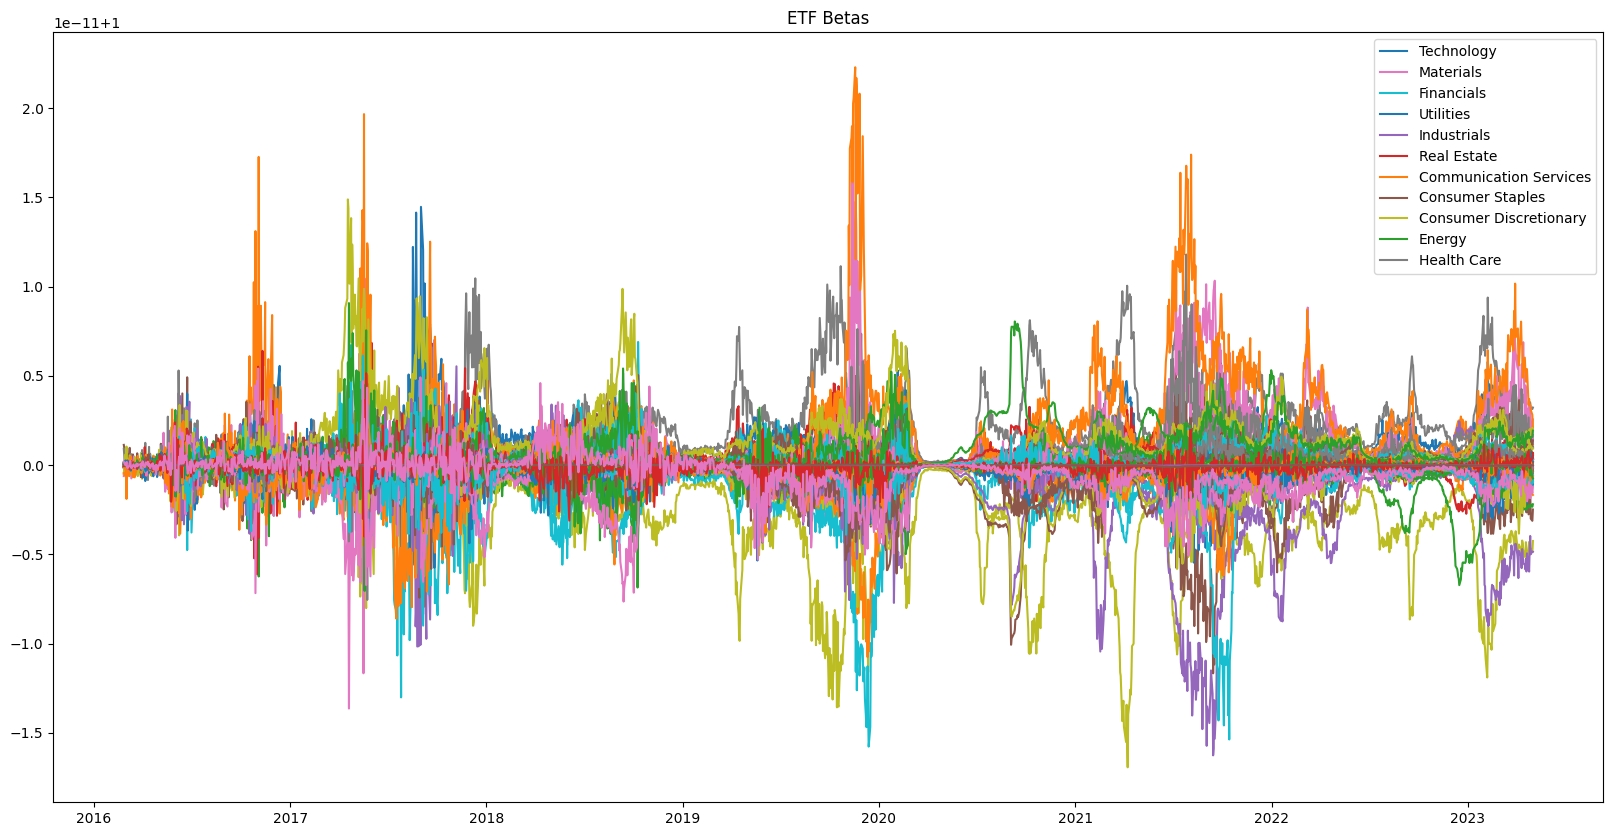

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

In [ ]:
sectors = ['XLK', 'XLV', 'XLI', 'XLC', 'XLY', 'XLP', 'XLE', 'XLF', 'XLB', 'XLRE', 'XLU']

sectors = {
    'XLK': 'Technology',
    'XLV': 'Health Care',
    'XLI': 'Industrials',
    'XLC': 'Communication Services',
    'XLY': 'Consumer Discretionary',
    'XLP': 'Consumer Staples',
    'XLE': 'Energy',
    'XLF': 'Financials',
    'XLB': 'Materials',
    'XLRE': 'Real Estate',
    'XLU': 'Utilities'
}

fig, ax = plt.subplots(figsize=(20, 10))

for etf in etfs:
    beta = df_portfolio_8_year[etf].rolling(window=60).cov(df_portfolio_8_year[etf]) / df_portfolio_8_year[etf].rolling(window=60).var()
    ax.plot(beta.index, beta, label=etfs[etf])

handles, labels = ax.get_legend_handles_labels()
unique_labels = list(set(labels))
custom_handles = [handles[labels.index(l)] for l in unique_labels]
ax.legend(custom_handles, unique_labels)

ax.set_title('ETF Betas')

plt.show()


for sector in sectors:
  
    data = yf.download(sector, start="2016-05-07", end="2023-05-07")

    plt.plot(data.index, data['Adj Close'], label=sector)

plt.title('Sector ETF Performance')
plt.xlabel('Date')
plt.ylabel('Closing Price')

plt.legend()

plt.show()

In [ ]:
ticker_symbol = 'SPY'
start_date = '2016-05-01'
end_date = '2022-05-08'

# Download the historical stock prices for the ticker
ticker_data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Plot the historical prices
plt.figure(figsize=(10, 6))
plt.plot(ticker_data['Close'])
plt.title('SPY Historical Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()



In [ ]:
sectors = ['XLK', 'XLV', 'XLI', 'XLC', 'XLY', 'XLP', 'XLE', 'XLF', 'XLB', 'XLRE', 'XLU']


start_date = '2022-05-07'
end_date = '2023-05-07'

for sector in sectors:
  
    data = yf.download(sector, start=start_date, end=end_date)

    
    daily_returns = data['Adj Close'].pct_change()
    historical_volatility = np.sqrt(252) * daily_returns.std()


    print('Historical Volatility for {} is {:.2%}'.format(sector, historical_volatility))